# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

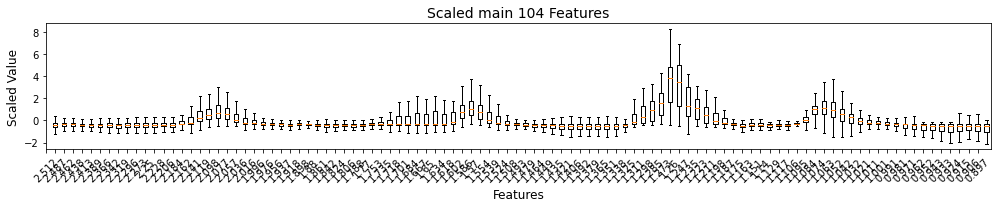

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

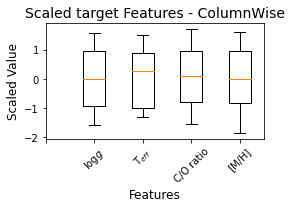

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

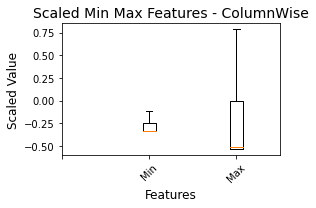

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:18 - loss: 1.8548 - gravity_loss: 0.4793 - c_o_ratio_loss: 0.4662 - metallicity_loss: 0.4541 - temperature_loss: 0.4552 - gravity_mae: 0.8838 - c_o_ratio_mae: 0.8832 - metallicity_mae: 0.8469 - temperature_mae: 0.8586

 2/13 [===>..........................] - ETA: 39s - loss: 1.8435 - gravity_loss: 0.4700 - c_o_ratio_loss: 0.4727 - metallicity_loss: 0.4502 - temperature_loss: 0.4507 - gravity_mae: 0.8736 - c_o_ratio_mae: 0.8921 - metallicity_mae: 0.8422 - temperature_mae: 0.8512 

 3/13 [=====>........................] - ETA: 36s - loss: 1.8354 - gravity_loss: 0.4682 - c_o_ratio_loss: 0.4706 - metallicity_loss: 0.4515 - temperature_loss: 0.4451 - gravity_mae: 0.8708 - c_o_ratio_mae: 0.8901 - metallicity_mae: 0.8440 - temperature_mae: 0.8433

 4/13 [========>.....................] - ETA: 33s - loss: 1.8109 - gravity_loss: 0.4644 - c_o_ratio_loss: 0.4717 - metallicity_loss: 0.4454 - temperature_loss: 0.4294 - gravity_mae: 0.8662 - c_o_ratio_mae: 0.8921 - metallicity_mae: 0.8383 - temperature_mae: 0.8235

 5/13 [==========>...................] - ETA: 30s - loss: 1.7690 - gravity_loss: 0.4610 - c_o_ratio_loss: 0.4702 - metallicity_loss: 0.4324 - temperature_loss: 0.4054 - gravity_mae: 0.8619 - c_o_ratio_mae: 0.8909 - metallicity_mae: 0.8244 - temperature_mae: 0.7907

 6/13 [============>.................] - ETA: 26s - loss: 1.7151 - gravity_loss: 0.4601 - c_o_ratio_loss: 0.4658 - metallicity_loss: 0.4174 - temperature_loss: 0.3719 - gravity_mae: 0.8618 - c_o_ratio_mae: 0.8859 - metallicity_mae: 0.8059 - temperature_mae: 0.7443

 7/13 [===============>..............] - ETA: 22s - loss: 1.6575 - gravity_loss: 0.4562 - c_o_ratio_loss: 0.4642 - metallicity_loss: 0.4008 - temperature_loss: 0.3363 - gravity_mae: 0.8575 - c_o_ratio_mae: 0.8838 - metallicity_mae: 0.7842 - temperature_mae: 0.6969

 8/13 [=================>............] - ETA: 18s - loss: 1.6485 - gravity_loss: 0.4502 - c_o_ratio_loss: 0.4593 - metallicity_loss: 0.3987 - temperature_loss: 0.3403 - gravity_mae: 0.8501 - c_o_ratio_mae: 0.8773 - metallicity_mae: 0.7810 - temperature_mae: 0.7042

 9/13 [===================>..........] - ETA: 15s - loss: 1.6155 - gravity_loss: 0.4447 - c_o_ratio_loss: 0.4560 - metallicity_loss: 0.3875 - temperature_loss: 0.3272 - gravity_mae: 0.8434 - c_o_ratio_mae: 0.8736 - metallicity_mae: 0.7653 - temperature_mae: 0.6859

10/13 [======================>.......] - ETA: 11s - loss: 1.5817 - gravity_loss: 0.4424 - c_o_ratio_loss: 0.4516 - metallicity_loss: 0.3777 - temperature_loss: 0.3100 - gravity_mae: 0.8409 - c_o_ratio_mae: 0.8684 - metallicity_mae: 0.7523 - temperature_mae: 0.6635

11/13 [========================>.....] - ETA: 7s - loss: 1.5363 - gravity_loss: 0.4380 - c_o_ratio_loss: 0.4465 - metallicity_loss: 0.3654 - temperature_loss: 0.2864 - gravity_mae: 0.8357 - c_o_ratio_mae: 0.8623 - metallicity_mae: 0.7362 - temperature_mae: 0.6257 

12/13 [==========================>...] - ETA: 3s - loss: 1.5031 - gravity_loss: 0.4328 - c_o_ratio_loss: 0.4425 - metallicity_loss: 0.3553 - temperature_loss: 0.2725 - gravity_mae: 0.8298 - c_o_ratio_mae: 0.8573 - metallicity_mae: 0.7228 - temperature_mae: 0.6094

13/13 [==============================] - ETA: 0s - loss: 1.4959 - gravity_loss: 0.4314 - c_o_ratio_loss: 0.4410 - metallicity_loss: 0.3535 - temperature_loss: 0.2700 - gravity_mae: 0.8281 - c_o_ratio_mae: 0.8555 - metallicity_mae: 0.7204 - temperature_mae: 0.6066

13/13 [==============================] - 52s 4s/step - loss: 1.4959 - gravity_loss: 0.4314 - c_o_ratio_loss: 0.4410 - metallicity_loss: 0.3535 - temperature_loss: 0.2700 - gravity_mae: 0.8281 - c_o_ratio_mae: 0.8555 - metallicity_mae: 0.7204 - temperature_mae: 0.6066 - val_loss: 1.0244 - val_gravity_loss: 0.3597 - val_c_o_ratio_loss: 0.3406 - val_metallicity_loss: 0.2216 - val_temperature_loss: 0.1025 - val_gravity_mae: 0.7403 - val_c_o_ratio_mae: 0.7303 - val_metallicity_mae: 0.5394 - val_temperature_mae: 0.3922


Epoch 2/4


 1/13 [=>............................] - ETA: 45s - loss: 1.0728 - gravity_loss: 0.3628 - c_o_ratio_loss: 0.3661 - metallicity_loss: 0.2359 - temperature_loss: 0.1080 - gravity_mae: 0.7408 - c_o_ratio_mae: 0.7598 - metallicity_mae: 0.5604 - temperature_mae: 0.3937

 2/13 [===>..........................] - ETA: 43s - loss: 1.0360 - gravity_loss: 0.3599 - c_o_ratio_loss: 0.3544 - metallicity_loss: 0.2285 - temperature_loss: 0.0932 - gravity_mae: 0.7368 - c_o_ratio_mae: 0.7454 - metallicity_mae: 0.5553 - temperature_mae: 0.3532

 3/13 [=====>........................] - ETA: 39s - loss: 1.0125 - gravity_loss: 0.3637 - c_o_ratio_loss: 0.3370 - metallicity_loss: 0.2259 - temperature_loss: 0.0859 - gravity_mae: 0.7411 - c_o_ratio_mae: 0.7210 - metallicity_mae: 0.5523 - temperature_mae: 0.3327

 4/13 [========>.....................] - ETA: 35s - loss: 0.9918 - gravity_loss: 0.3645 - c_o_ratio_loss: 0.3232 - metallicity_loss: 0.2221 - temperature_loss: 0.0819 - gravity_mae: 0.7404 - c_o_ratio_mae: 0.7000 - metallicity_mae: 0.5465 - temperature_mae: 0.3250

 5/13 [==========>...................] - ETA: 31s - loss: 0.9631 - gravity_loss: 0.3624 - c_o_ratio_loss: 0.3075 - metallicity_loss: 0.2169 - temperature_loss: 0.0763 - gravity_mae: 0.7384 - c_o_ratio_mae: 0.6754 - metallicity_mae: 0.5409 - temperature_mae: 0.3125

 6/13 [============>.................] - ETA: 27s - loss: 0.9413 - gravity_loss: 0.3599 - c_o_ratio_loss: 0.2977 - metallicity_loss: 0.2135 - temperature_loss: 0.0702 - gravity_mae: 0.7350 - c_o_ratio_mae: 0.6605 - metallicity_mae: 0.5366 - temperature_mae: 0.2965

 7/13 [===============>..............] - ETA: 23s - loss: 0.9310 - gravity_loss: 0.3598 - c_o_ratio_loss: 0.2933 - metallicity_loss: 0.2117 - temperature_loss: 0.0662 - gravity_mae: 0.7341 - c_o_ratio_mae: 0.6537 - metallicity_mae: 0.5339 - temperature_mae: 0.2862

 8/13 [=================>............] - ETA: 19s - loss: 0.9199 - gravity_loss: 0.3576 - c_o_ratio_loss: 0.2890 - metallicity_loss: 0.2080 - temperature_loss: 0.0652 - gravity_mae: 0.7311 - c_o_ratio_mae: 0.6473 - metallicity_mae: 0.5285 - temperature_mae: 0.2834

 9/13 [===================>..........] - ETA: 15s - loss: 0.9061 - gravity_loss: 0.3549 - c_o_ratio_loss: 0.2828 - metallicity_loss: 0.2063 - temperature_loss: 0.0620 - gravity_mae: 0.7279 - c_o_ratio_mae: 0.6368 - metallicity_mae: 0.5260 - temperature_mae: 0.2744

10/13 [======================>.......] - ETA: 11s - loss: 0.8909 - gravity_loss: 0.3522 - c_o_ratio_loss: 0.2746 - metallicity_loss: 0.2038 - temperature_loss: 0.0603 - gravity_mae: 0.7245 - c_o_ratio_mae: 0.6235 - metallicity_mae: 0.5222 - temperature_mae: 0.2706

11/13 [========================>.....] - ETA: 7s - loss: 0.8773 - gravity_loss: 0.3500 - c_o_ratio_loss: 0.2674 - metallicity_loss: 0.2024 - temperature_loss: 0.0575 - gravity_mae: 0.7214 - c_o_ratio_mae: 0.6130 - metallicity_mae: 0.5204 - temperature_mae: 0.2635 

12/13 [==========================>...] - ETA: 3s - loss: 0.8647 - gravity_loss: 0.3472 - c_o_ratio_loss: 0.2621 - metallicity_loss: 0.2005 - temperature_loss: 0.0550 - gravity_mae: 0.7176 - c_o_ratio_mae: 0.6056 - metallicity_mae: 0.5180 - temperature_mae: 0.2574

13/13 [==============================] - ETA: 0s - loss: 0.8615 - gravity_loss: 0.3463 - c_o_ratio_loss: 0.2607 - metallicity_loss: 0.2000 - temperature_loss: 0.0545 - gravity_mae: 0.7165 - c_o_ratio_mae: 0.6038 - metallicity_mae: 0.5173 - temperature_mae: 0.2559

13/13 [==============================] - 51s 4s/step - loss: 0.8615 - gravity_loss: 0.3463 - c_o_ratio_loss: 0.2607 - metallicity_loss: 0.2000 - temperature_loss: 0.0545 - gravity_mae: 0.7165 - c_o_ratio_mae: 0.6038 - metallicity_mae: 0.5173 - temperature_mae: 0.2559 - val_loss: 0.6750 - val_gravity_loss: 0.3072 - val_c_o_ratio_loss: 0.1600 - val_metallicity_loss: 0.1797 - val_temperature_loss: 0.0280 - val_gravity_mae: 0.6646 - val_c_o_ratio_mae: 0.4470 - val_metallicity_mae: 0.4888 - val_temperature_mae: 0.1813


Epoch 3/4


 1/13 [=>............................] - ETA: 46s - loss: 0.7173 - gravity_loss: 0.3343 - c_o_ratio_loss: 0.1781 - metallicity_loss: 0.1712 - temperature_loss: 0.0338 - gravity_mae: 0.6963 - c_o_ratio_mae: 0.4783 - metallicity_mae: 0.4784 - temperature_mae: 0.1920

 2/13 [===>..........................] - ETA: 48s - loss: 0.7110 - gravity_loss: 0.3295 - c_o_ratio_loss: 0.1723 - metallicity_loss: 0.1765 - temperature_loss: 0.0327 - gravity_mae: 0.6896 - c_o_ratio_mae: 0.4693 - metallicity_mae: 0.4872 - temperature_mae: 0.1892

 3/13 [=====>........................] - ETA: 44s - loss: 0.6987 - gravity_loss: 0.3244 - c_o_ratio_loss: 0.1683 - metallicity_loss: 0.1741 - temperature_loss: 0.0320 - gravity_mae: 0.6826 - c_o_ratio_mae: 0.4574 - metallicity_mae: 0.4813 - temperature_mae: 0.1865

 4/13 [========>.....................] - ETA: 40s - loss: 0.6958 - gravity_loss: 0.3229 - c_o_ratio_loss: 0.1692 - metallicity_loss: 0.1737 - temperature_loss: 0.0300 - gravity_mae: 0.6804 - c_o_ratio_mae: 0.4611 - metallicity_mae: 0.4808 - temperature_mae: 0.1810

 5/13 [==========>...................] - ETA: 36s - loss: 0.6907 - gravity_loss: 0.3213 - c_o_ratio_loss: 0.1673 - metallicity_loss: 0.1725 - temperature_loss: 0.0297 - gravity_mae: 0.6784 - c_o_ratio_mae: 0.4573 - metallicity_mae: 0.4785 - temperature_mae: 0.1796

 6/13 [============>.................] - ETA: 31s - loss: 0.6827 - gravity_loss: 0.3184 - c_o_ratio_loss: 0.1631 - metallicity_loss: 0.1726 - temperature_loss: 0.0286 - gravity_mae: 0.6752 - c_o_ratio_mae: 0.4510 - metallicity_mae: 0.4781 - temperature_mae: 0.1773

 7/13 [===============>..............] - ETA: 27s - loss: 0.6722 - gravity_loss: 0.3154 - c_o_ratio_loss: 0.1562 - metallicity_loss: 0.1726 - temperature_loss: 0.0280 - gravity_mae: 0.6718 - c_o_ratio_mae: 0.4406 - metallicity_mae: 0.4777 - temperature_mae: 0.1762

 8/13 [=================>............] - ETA: 22s - loss: 0.6677 - gravity_loss: 0.3139 - c_o_ratio_loss: 0.1546 - metallicity_loss: 0.1719 - temperature_loss: 0.0272 - gravity_mae: 0.6704 - c_o_ratio_mae: 0.4379 - metallicity_mae: 0.4768 - temperature_mae: 0.1747

 9/13 [===================>..........] - ETA: 18s - loss: 0.6637 - gravity_loss: 0.3126 - c_o_ratio_loss: 0.1520 - metallicity_loss: 0.1725 - temperature_loss: 0.0267 - gravity_mae: 0.6690 - c_o_ratio_mae: 0.4354 - metallicity_mae: 0.4780 - temperature_mae: 0.1739

10/13 [======================>.......] - ETA: 13s - loss: 0.6577 - gravity_loss: 0.3107 - c_o_ratio_loss: 0.1486 - metallicity_loss: 0.1724 - temperature_loss: 0.0260 - gravity_mae: 0.6665 - c_o_ratio_mae: 0.4306 - metallicity_mae: 0.4770 - temperature_mae: 0.1716

11/13 [========================>.....] - ETA: 9s - loss: 0.6524 - gravity_loss: 0.3091 - c_o_ratio_loss: 0.1466 - metallicity_loss: 0.1713 - temperature_loss: 0.0254 - gravity_mae: 0.6645 - c_o_ratio_mae: 0.4259 - metallicity_mae: 0.4752 - temperature_mae: 0.1690 

12/13 [==========================>...] - ETA: 4s - loss: 0.6484 - gravity_loss: 0.3092 - c_o_ratio_loss: 0.1436 - metallicity_loss: 0.1708 - temperature_loss: 0.0248 - gravity_mae: 0.6649 - c_o_ratio_mae: 0.4214 - metallicity_mae: 0.4739 - temperature_mae: 0.1675

13/13 [==============================] - ETA: 0s - loss: 0.6467 - gravity_loss: 0.3085 - c_o_ratio_loss: 0.1431 - metallicity_loss: 0.1704 - temperature_loss: 0.0247 - gravity_mae: 0.6639 - c_o_ratio_mae: 0.4207 - metallicity_mae: 0.4734 - temperature_mae: 0.1670

13/13 [==============================] - 58s 4s/step - loss: 0.6467 - gravity_loss: 0.3085 - c_o_ratio_loss: 0.1431 - metallicity_loss: 0.1704 - temperature_loss: 0.0247 - gravity_mae: 0.6639 - c_o_ratio_mae: 0.4207 - metallicity_mae: 0.4734 - temperature_mae: 0.1670 - val_loss: 0.5648 - val_gravity_loss: 0.2754 - val_c_o_ratio_loss: 0.1106 - val_metallicity_loss: 0.1638 - val_temperature_loss: 0.0150 - val_gravity_mae: 0.6176 - val_c_o_ratio_mae: 0.3625 - val_metallicity_mae: 0.4618 - val_temperature_mae: 0.1332


Epoch 4/4


 1/13 [=>............................] - ETA: 51s - loss: 0.5742 - gravity_loss: 0.2843 - c_o_ratio_loss: 0.1093 - metallicity_loss: 0.1626 - temperature_loss: 0.0180 - gravity_mae: 0.6338 - c_o_ratio_mae: 0.3579 - metallicity_mae: 0.4583 - temperature_mae: 0.1461

 2/13 [===>..........................] - ETA: 48s - loss: 0.5762 - gravity_loss: 0.2887 - c_o_ratio_loss: 0.1035 - metallicity_loss: 0.1663 - temperature_loss: 0.0176 - gravity_mae: 0.6387 - c_o_ratio_mae: 0.3480 - metallicity_mae: 0.4666 - temperature_mae: 0.1429

 3/13 [=====>........................] - ETA: 44s - loss: 0.5826 - gravity_loss: 0.2904 - c_o_ratio_loss: 0.1087 - metallicity_loss: 0.1663 - temperature_loss: 0.0172 - gravity_mae: 0.6398 - c_o_ratio_mae: 0.3616 - metallicity_mae: 0.4693 - temperature_mae: 0.1412

 4/13 [========>.....................] - ETA: 40s - loss: 0.5742 - gravity_loss: 0.2884 - c_o_ratio_loss: 0.1056 - metallicity_loss: 0.1635 - temperature_loss: 0.0168 - gravity_mae: 0.6368 - c_o_ratio_mae: 0.3562 - metallicity_mae: 0.4632 - temperature_mae: 0.1395

 5/13 [==========>...................] - ETA: 35s - loss: 0.5699 - gravity_loss: 0.2871 - c_o_ratio_loss: 0.1037 - metallicity_loss: 0.1622 - temperature_loss: 0.0169 - gravity_mae: 0.6344 - c_o_ratio_mae: 0.3527 - metallicity_mae: 0.4605 - temperature_mae: 0.1392

 6/13 [============>.................] - ETA: 30s - loss: 0.5684 - gravity_loss: 0.2873 - c_o_ratio_loss: 0.1030 - metallicity_loss: 0.1612 - temperature_loss: 0.0169 - gravity_mae: 0.6341 - c_o_ratio_mae: 0.3525 - metallicity_mae: 0.4594 - temperature_mae: 0.1400

 7/13 [===============>..............] - ETA: 26s - loss: 0.5622 - gravity_loss: 0.2845 - c_o_ratio_loss: 0.1016 - metallicity_loss: 0.1595 - temperature_loss: 0.0165 - gravity_mae: 0.6311 - c_o_ratio_mae: 0.3489 - metallicity_mae: 0.4571 - temperature_mae: 0.1387

 8/13 [=================>............] - ETA: 22s - loss: 0.5562 - gravity_loss: 0.2812 - c_o_ratio_loss: 0.1009 - metallicity_loss: 0.1575 - temperature_loss: 0.0165 - gravity_mae: 0.6271 - c_o_ratio_mae: 0.3470 - metallicity_mae: 0.4542 - temperature_mae: 0.1392

 9/13 [===================>..........] - ETA: 17s - loss: 0.5517 - gravity_loss: 0.2788 - c_o_ratio_loss: 0.0998 - metallicity_loss: 0.1565 - temperature_loss: 0.0166 - gravity_mae: 0.6233 - c_o_ratio_mae: 0.3455 - metallicity_mae: 0.4527 - temperature_mae: 0.1400

10/13 [======================>.......] - ETA: 13s - loss: 0.5446 - gravity_loss: 0.2759 - c_o_ratio_loss: 0.0978 - metallicity_loss: 0.1546 - temperature_loss: 0.0164 - gravity_mae: 0.6189 - c_o_ratio_mae: 0.3413 - metallicity_mae: 0.4497 - temperature_mae: 0.1392

11/13 [========================>.....] - ETA: 8s - loss: 0.5418 - gravity_loss: 0.2751 - c_o_ratio_loss: 0.0969 - metallicity_loss: 0.1535 - temperature_loss: 0.0163 - gravity_mae: 0.6179 - c_o_ratio_mae: 0.3394 - metallicity_mae: 0.4484 - temperature_mae: 0.1396 

12/13 [==========================>...] - ETA: 4s - loss: 0.5378 - gravity_loss: 0.2726 - c_o_ratio_loss: 0.0967 - metallicity_loss: 0.1523 - temperature_loss: 0.0161 - gravity_mae: 0.6136 - c_o_ratio_mae: 0.3392 - metallicity_mae: 0.4468 - temperature_mae: 0.1388

13/13 [==============================] - ETA: 0s - loss: 0.5370 - gravity_loss: 0.2725 - c_o_ratio_loss: 0.0966 - metallicity_loss: 0.1519 - temperature_loss: 0.0161 - gravity_mae: 0.6135 - c_o_ratio_mae: 0.3386 - metallicity_mae: 0.4461 - temperature_mae: 0.1385

13/13 [==============================] - 56s 4s/step - loss: 0.5370 - gravity_loss: 0.2725 - c_o_ratio_loss: 0.0966 - metallicity_loss: 0.1519 - temperature_loss: 0.0161 - gravity_mae: 0.6135 - c_o_ratio_mae: 0.3386 - metallicity_mae: 0.4461 - temperature_mae: 0.1385 - val_loss: 0.4498 - val_gravity_loss: 0.2301 - val_c_o_ratio_loss: 0.0698 - val_metallicity_loss: 0.1395 - val_temperature_loss: 0.0102 - val_gravity_mae: 0.5616 - val_c_o_ratio_mae: 0.2799 - val_metallicity_mae: 0.4283 - val_temperature_mae: 0.1105


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:47

  3/782 [..............................] - ETA: 40s 

  5/782 [..............................] - ETA: 38s

  6/782 [..............................] - ETA: 38s

  7/782 [..............................] - ETA: 39s

  9/782 [..............................] - ETA: 39s

 10/782 [..............................] - ETA: 39s

 11/782 [..............................] - ETA: 39s

 13/782 [..............................] - ETA: 39s

 15/782 [..............................] - ETA: 39s

 17/782 [..............................] - ETA: 39s

 19/782 [..............................] - ETA: 38s

 21/782 [..............................] - ETA: 38s

 22/782 [..............................] - ETA: 38s

 24/782 [..............................] - ETA: 38s

 25/782 [..............................] - ETA: 38s

 26/782 [..............................] - ETA: 38s

 28/782 [>.............................] - ETA: 37s

 29/782 [>.............................] - ETA: 37s

 31/782 [>.............................] - ETA: 37s

 33/782 [>.............................] - ETA: 37s

 34/782 [>.............................] - ETA: 37s

 36/782 [>.............................] - ETA: 37s

 37/782 [>.............................] - ETA: 37s

 39/782 [>.............................] - ETA: 37s

 40/782 [>.............................] - ETA: 37s

 41/782 [>.............................] - ETA: 37s

 43/782 [>.............................] - ETA: 36s

 44/782 [>.............................] - ETA: 37s

 46/782 [>.............................] - ETA: 36s

 47/782 [>.............................] - ETA: 36s

 49/782 [>.............................] - ETA: 36s

 50/782 [>.............................] - ETA: 36s

 51/782 [>.............................] - ETA: 36s

 52/782 [>.............................] - ETA: 36s

 53/782 [=>............................] - ETA: 36s

 55/782 [=>............................] - ETA: 36s

 56/782 [=>............................] - ETA: 36s

 58/782 [=>............................] - ETA: 36s

 59/782 [=>............................] - ETA: 36s

 60/782 [=>............................] - ETA: 36s

 62/782 [=>............................] - ETA: 36s

 64/782 [=>............................] - ETA: 36s

 66/782 [=>............................] - ETA: 35s

 67/782 [=>............................] - ETA: 35s

 68/782 [=>............................] - ETA: 35s

 69/782 [=>............................] - ETA: 35s

 70/782 [=>............................] - ETA: 35s

 71/782 [=>............................] - ETA: 36s

 72/782 [=>............................] - ETA: 36s

 74/782 [=>............................] - ETA: 35s

 76/782 [=>............................] - ETA: 35s

 78/782 [=>............................] - ETA: 35s

 80/782 [==>...........................] - ETA: 35s

 82/782 [==>...........................] - ETA: 34s

 84/782 [==>...........................] - ETA: 34s

 86/782 [==>...........................] - ETA: 34s

 88/782 [==>...........................] - ETA: 34s

 89/782 [==>...........................] - ETA: 34s

 90/782 [==>...........................] - ETA: 34s

 91/782 [==>...........................] - ETA: 34s

 93/782 [==>...........................] - ETA: 34s

 95/782 [==>...........................] - ETA: 33s

 97/782 [==>...........................] - ETA: 33s

 99/782 [==>...........................] - ETA: 33s

100/782 [==>...........................] - ETA: 33s

101/782 [==>...........................] - ETA: 33s

102/782 [==>...........................] - ETA: 33s

103/782 [==>...........................] - ETA: 33s

105/782 [===>..........................] - ETA: 33s

106/782 [===>..........................] - ETA: 33s

108/782 [===>..........................] - ETA: 33s

109/782 [===>..........................] - ETA: 33s

110/782 [===>..........................] - ETA: 33s

111/782 [===>..........................] - ETA: 33s

112/782 [===>..........................] - ETA: 33s

113/782 [===>..........................] - ETA: 33s

115/782 [===>..........................] - ETA: 33s

116/782 [===>..........................] - ETA: 33s

117/782 [===>..........................] - ETA: 33s

118/782 [===>..........................] - ETA: 33s

120/782 [===>..........................] - ETA: 33s

121/782 [===>..........................] - ETA: 32s

123/782 [===>..........................] - ETA: 32s

125/782 [===>..........................] - ETA: 32s

126/782 [===>..........................] - ETA: 32s

127/782 [===>..........................] - ETA: 32s

129/782 [===>..........................] - ETA: 32s

130/782 [===>..........................] - ETA: 32s

131/782 [====>.........................] - ETA: 32s

133/782 [====>.........................] - ETA: 32s

135/782 [====>.........................] - ETA: 32s

137/782 [====>.........................] - ETA: 32s

139/782 [====>.........................] - ETA: 31s

141/782 [====>.........................] - ETA: 31s

142/782 [====>.........................] - ETA: 31s

143/782 [====>.........................] - ETA: 31s

145/782 [====>.........................] - ETA: 31s

147/782 [====>.........................] - ETA: 31s

149/782 [====>.........................] - ETA: 31s

150/782 [====>.........................] - ETA: 31s

152/782 [====>.........................] - ETA: 31s

153/782 [====>.........................] - ETA: 31s

154/782 [====>.........................] - ETA: 31s

155/782 [====>.........................] - ETA: 31s

157/782 [=====>........................] - ETA: 31s

158/782 [=====>........................] - ETA: 30s

159/782 [=====>........................] - ETA: 30s

161/782 [=====>........................] - ETA: 30s

162/782 [=====>........................] - ETA: 30s

163/782 [=====>........................] - ETA: 30s

165/782 [=====>........................] - ETA: 30s

166/782 [=====>........................] - ETA: 30s

167/782 [=====>........................] - ETA: 30s

168/782 [=====>........................] - ETA: 30s

170/782 [=====>........................] - ETA: 30s

171/782 [=====>........................] - ETA: 30s

172/782 [=====>........................] - ETA: 30s

173/782 [=====>........................] - ETA: 30s

174/782 [=====>........................] - ETA: 30s

175/782 [=====>........................] - ETA: 30s

176/782 [=====>........................] - ETA: 30s

178/782 [=====>........................] - ETA: 30s

179/782 [=====>........................] - ETA: 30s

181/782 [=====>........................] - ETA: 29s

183/782 [======>.......................] - ETA: 29s

185/782 [======>.......................] - ETA: 29s

187/782 [======>.......................] - ETA: 29s

188/782 [======>.......................] - ETA: 29s

189/782 [======>.......................] - ETA: 29s

190/782 [======>.......................] - ETA: 29s

191/782 [======>.......................] - ETA: 29s

193/782 [======>.......................] - ETA: 29s

195/782 [======>.......................] - ETA: 29s

196/782 [======>.......................] - ETA: 29s

197/782 [======>.......................] - ETA: 29s

198/782 [======>.......................] - ETA: 29s

199/782 [======>.......................] - ETA: 29s

201/782 [======>.......................] - ETA: 28s

202/782 [======>.......................] - ETA: 28s

203/782 [======>.......................] - ETA: 28s

205/782 [======>.......................] - ETA: 28s

207/782 [======>.......................] - ETA: 28s

209/782 [=======>......................] - ETA: 28s

211/782 [=======>......................] - ETA: 28s

212/782 [=======>......................] - ETA: 28s

214/782 [=======>......................] - ETA: 28s

215/782 [=======>......................] - ETA: 28s

217/782 [=======>......................] - ETA: 28s

218/782 [=======>......................] - ETA: 28s

219/782 [=======>......................] - ETA: 28s

221/782 [=======>......................] - ETA: 27s

222/782 [=======>......................] - ETA: 27s

223/782 [=======>......................] - ETA: 27s

224/782 [=======>......................] - ETA: 27s

226/782 [=======>......................] - ETA: 27s

228/782 [=======>......................] - ETA: 27s

229/782 [=======>......................] - ETA: 27s

231/782 [=======>......................] - ETA: 27s

232/782 [=======>......................] - ETA: 27s

234/782 [=======>......................] - ETA: 27s

235/782 [========>.....................] - ETA: 27s

237/782 [========>.....................] - ETA: 27s

238/782 [========>.....................] - ETA: 27s

240/782 [========>.....................] - ETA: 27s

241/782 [========>.....................] - ETA: 26s

242/782 [========>.....................] - ETA: 26s

243/782 [========>.....................] - ETA: 26s

245/782 [========>.....................] - ETA: 26s

247/782 [========>.....................] - ETA: 26s

248/782 [========>.....................] - ETA: 26s

250/782 [========>.....................] - ETA: 26s

251/782 [========>.....................] - ETA: 26s

253/782 [========>.....................] - ETA: 26s

254/782 [========>.....................] - ETA: 26s

256/782 [========>.....................] - ETA: 26s

258/782 [========>.....................] - ETA: 26s

259/782 [========>.....................] - ETA: 26s

260/782 [========>.....................] - ETA: 26s

261/782 [=========>....................] - ETA: 26s

263/782 [=========>....................] - ETA: 25s

264/782 [=========>....................] - ETA: 25s

266/782 [=========>....................] - ETA: 25s

268/782 [=========>....................] - ETA: 25s

269/782 [=========>....................] - ETA: 25s

271/782 [=========>....................] - ETA: 25s

272/782 [=========>....................] - ETA: 25s

274/782 [=========>....................] - ETA: 25s

276/782 [=========>....................] - ETA: 25s

277/782 [=========>....................] - ETA: 25s

279/782 [=========>....................] - ETA: 25s

280/782 [=========>....................] - ETA: 25s

282/782 [=========>....................] - ETA: 24s

283/782 [=========>....................] - ETA: 24s

284/782 [=========>....................] - ETA: 24s

285/782 [=========>....................] - ETA: 24s

287/782 [==========>...................] - ETA: 24s

288/782 [==========>...................] - ETA: 24s

289/782 [==========>...................] - ETA: 24s

290/782 [==========>...................] - ETA: 24s

292/782 [==========>...................] - ETA: 24s

294/782 [==========>...................] - ETA: 24s

296/782 [==========>...................] - ETA: 24s

298/782 [==========>...................] - ETA: 24s

300/782 [==========>...................] - ETA: 24s

301/782 [==========>...................] - ETA: 24s

302/782 [==========>...................] - ETA: 23s

304/782 [==========>...................] - ETA: 23s

305/782 [==========>...................] - ETA: 23s

306/782 [==========>...................] - ETA: 23s

308/782 [==========>...................] - ETA: 23s

310/782 [==========>...................] - ETA: 23s

311/782 [==========>...................] - ETA: 23s

313/782 [===========>..................] - ETA: 23s

314/782 [===========>..................] - ETA: 23s

316/782 [===========>..................] - ETA: 23s

318/782 [===========>..................] - ETA: 23s

320/782 [===========>..................] - ETA: 23s

321/782 [===========>..................] - ETA: 23s

322/782 [===========>..................] - ETA: 22s

323/782 [===========>..................] - ETA: 22s

325/782 [===========>..................] - ETA: 22s

327/782 [===========>..................] - ETA: 22s

329/782 [===========>..................] - ETA: 22s

330/782 [===========>..................] - ETA: 22s

331/782 [===========>..................] - ETA: 22s

332/782 [===========>..................] - ETA: 22s

333/782 [===========>..................] - ETA: 22s

334/782 [===========>..................] - ETA: 22s

336/782 [===========>..................] - ETA: 22s

337/782 [===========>..................] - ETA: 22s

338/782 [===========>..................] - ETA: 22s

340/782 [============>.................] - ETA: 22s

341/782 [============>.................] - ETA: 22s

342/782 [============>.................] - ETA: 21s

343/782 [============>.................] - ETA: 21s

345/782 [============>.................] - ETA: 21s

346/782 [============>.................] - ETA: 21s

348/782 [============>.................] - ETA: 21s

349/782 [============>.................] - ETA: 21s

350/782 [============>.................] - ETA: 21s

351/782 [============>.................] - ETA: 21s

352/782 [============>.................] - ETA: 21s

353/782 [============>.................] - ETA: 21s

354/782 [============>.................] - ETA: 21s

355/782 [============>.................] - ETA: 21s

356/782 [============>.................] - ETA: 21s

357/782 [============>.................] - ETA: 21s

359/782 [============>.................] - ETA: 21s

360/782 [============>.................] - ETA: 21s

361/782 [============>.................] - ETA: 21s

362/782 [============>.................] - ETA: 21s

364/782 [============>.................] - ETA: 20s

366/782 [=============>................] - ETA: 20s

367/782 [=============>................] - ETA: 20s

368/782 [=============>................] - ETA: 20s

369/782 [=============>................] - ETA: 20s

370/782 [=============>................] - ETA: 20s

371/782 [=============>................] - ETA: 20s

372/782 [=============>................] - ETA: 20s

373/782 [=============>................] - ETA: 20s

375/782 [=============>................] - ETA: 20s

376/782 [=============>................] - ETA: 20s

378/782 [=============>................] - ETA: 20s

379/782 [=============>................] - ETA: 20s

380/782 [=============>................] - ETA: 20s

382/782 [=============>................] - ETA: 20s

383/782 [=============>................] - ETA: 19s

384/782 [=============>................] - ETA: 19s

385/782 [=============>................] - ETA: 19s

387/782 [=============>................] - ETA: 19s

389/782 [=============>................] - ETA: 19s

390/782 [=============>................] - ETA: 19s

391/782 [==============>...............] - ETA: 19s

393/782 [==============>...............] - ETA: 19s

394/782 [==============>...............] - ETA: 19s

396/782 [==============>...............] - ETA: 19s

398/782 [==============>...............] - ETA: 19s

399/782 [==============>...............] - ETA: 19s

400/782 [==============>...............] - ETA: 19s

401/782 [==============>...............] - ETA: 19s

403/782 [==============>...............] - ETA: 19s

404/782 [==============>...............] - ETA: 18s

405/782 [==============>...............] - ETA: 18s

406/782 [==============>...............] - ETA: 18s

407/782 [==============>...............] - ETA: 18s

409/782 [==============>...............] - ETA: 18s

411/782 [==============>...............] - ETA: 18s

413/782 [==============>...............] - ETA: 18s

415/782 [==============>...............] - ETA: 18s

416/782 [==============>...............] - ETA: 18s

417/782 [==============>...............] - ETA: 18s

418/782 [===============>..............] - ETA: 18s

419/782 [===============>..............] - ETA: 18s

421/782 [===============>..............] - ETA: 18s

423/782 [===============>..............] - ETA: 18s

424/782 [===============>..............] - ETA: 17s

425/782 [===============>..............] - ETA: 17s

427/782 [===============>..............] - ETA: 17s

428/782 [===============>..............] - ETA: 17s

429/782 [===============>..............] - ETA: 17s

430/782 [===============>..............] - ETA: 17s

431/782 [===============>..............] - ETA: 17s

432/782 [===============>..............] - ETA: 17s

433/782 [===============>..............] - ETA: 17s

434/782 [===============>..............] - ETA: 17s

435/782 [===============>..............] - ETA: 17s

437/782 [===============>..............] - ETA: 17s

439/782 [===============>..............] - ETA: 17s

441/782 [===============>..............] - ETA: 17s

442/782 [===============>..............] - ETA: 17s

444/782 [================>.............] - ETA: 16s

445/782 [================>.............] - ETA: 16s

446/782 [================>.............] - ETA: 16s

448/782 [================>.............] - ETA: 16s

449/782 [================>.............] - ETA: 16s

450/782 [================>.............] - ETA: 16s

452/782 [================>.............] - ETA: 16s

454/782 [================>.............] - ETA: 16s

455/782 [================>.............] - ETA: 16s

457/782 [================>.............] - ETA: 16s

458/782 [================>.............] - ETA: 16s

459/782 [================>.............] - ETA: 16s

460/782 [================>.............] - ETA: 16s

461/782 [================>.............] - ETA: 16s

463/782 [================>.............] - ETA: 16s

464/782 [================>.............] - ETA: 15s

465/782 [================>.............] - ETA: 15s

466/782 [================>.............] - ETA: 15s

467/782 [================>.............] - ETA: 15s

468/782 [================>.............] - ETA: 15s

469/782 [================>.............] - ETA: 15s

470/782 [=================>............] - ETA: 15s

471/782 [=================>............] - ETA: 15s

472/782 [=================>............] - ETA: 15s

474/782 [=================>............] - ETA: 15s

476/782 [=================>............] - ETA: 15s

477/782 [=================>............] - ETA: 15s

479/782 [=================>............] - ETA: 15s

480/782 [=================>............] - ETA: 15s

481/782 [=================>............] - ETA: 15s

482/782 [=================>............] - ETA: 15s

484/782 [=================>............] - ETA: 14s

485/782 [=================>............] - ETA: 14s

486/782 [=================>............] - ETA: 14s

487/782 [=================>............] - ETA: 14s

488/782 [=================>............] - ETA: 14s

489/782 [=================>............] - ETA: 14s

490/782 [=================>............] - ETA: 14s

491/782 [=================>............] - ETA: 14s

493/782 [=================>............] - ETA: 14s

494/782 [=================>............] - ETA: 14s

495/782 [=================>............] - ETA: 14s

496/782 [==================>...........] - ETA: 14s

497/782 [==================>...........] - ETA: 14s

498/782 [==================>...........] - ETA: 14s

499/782 [==================>...........] - ETA: 14s

501/782 [==================>...........] - ETA: 14s

502/782 [==================>...........] - ETA: 14s

503/782 [==================>...........] - ETA: 14s

504/782 [==================>...........] - ETA: 13s

505/782 [==================>...........] - ETA: 13s

506/782 [==================>...........] - ETA: 13s

507/782 [==================>...........] - ETA: 13s

509/782 [==================>...........] - ETA: 13s

510/782 [==================>...........] - ETA: 13s

511/782 [==================>...........] - ETA: 13s

512/782 [==================>...........] - ETA: 13s

514/782 [==================>...........] - ETA: 13s

516/782 [==================>...........] - ETA: 13s

517/782 [==================>...........] - ETA: 13s

518/782 [==================>...........] - ETA: 13s

520/782 [==================>...........] - ETA: 13s

522/782 [===================>..........] - ETA: 13s

523/782 [===================>..........] - ETA: 13s

525/782 [===================>..........] - ETA: 12s

527/782 [===================>..........] - ETA: 12s

528/782 [===================>..........] - ETA: 12s

529/782 [===================>..........] - ETA: 12s

531/782 [===================>..........] - ETA: 12s

532/782 [===================>..........] - ETA: 12s

533/782 [===================>..........] - ETA: 12s

534/782 [===================>..........] - ETA: 12s

535/782 [===================>..........] - ETA: 12s

536/782 [===================>..........] - ETA: 12s

537/782 [===================>..........] - ETA: 12s

538/782 [===================>..........] - ETA: 12s

539/782 [===================>..........] - ETA: 12s

541/782 [===================>..........] - ETA: 12s

542/782 [===================>..........] - ETA: 12s

543/782 [===================>..........] - ETA: 12s

544/782 [===================>..........] - ETA: 11s

545/782 [===================>..........] - ETA: 11s

546/782 [===================>..........] - ETA: 11s

547/782 [===================>..........] - ETA: 11s

548/782 [====================>.........] - ETA: 11s

549/782 [====================>.........] - ETA: 11s

551/782 [====================>.........] - ETA: 11s

553/782 [====================>.........] - ETA: 11s

555/782 [====================>.........] - ETA: 11s

556/782 [====================>.........] - ETA: 11s

557/782 [====================>.........] - ETA: 11s

559/782 [====================>.........] - ETA: 11s

561/782 [====================>.........] - ETA: 11s

562/782 [====================>.........] - ETA: 11s

564/782 [====================>.........] - ETA: 10s

565/782 [====================>.........] - ETA: 10s

566/782 [====================>.........] - ETA: 10s

568/782 [====================>.........] - ETA: 10s

570/782 [====================>.........] - ETA: 10s

572/782 [====================>.........] - ETA: 10s

574/782 [=====================>........] - ETA: 10s

575/782 [=====================>........] - ETA: 10s

576/782 [=====================>........] - ETA: 10s

577/782 [=====================>........] - ETA: 10s

578/782 [=====================>........] - ETA: 10s

579/782 [=====================>........] - ETA: 10s

580/782 [=====================>........] - ETA: 10s

581/782 [=====================>........] - ETA: 10s

582/782 [=====================>........] - ETA: 10s

583/782 [=====================>........] - ETA: 10s

584/782 [=====================>........] - ETA: 9s 

585/782 [=====================>........] - ETA: 9s

586/782 [=====================>........] - ETA: 9s

588/782 [=====================>........] - ETA: 9s

589/782 [=====================>........] - ETA: 9s

590/782 [=====================>........] - ETA: 9s

591/782 [=====================>........] - ETA: 9s

593/782 [=====================>........] - ETA: 9s

594/782 [=====================>........] - ETA: 9s

596/782 [=====================>........] - ETA: 9s

597/782 [=====================>........] - ETA: 9s

599/782 [=====================>........] - ETA: 9s

600/782 [======================>.......] - ETA: 9s

602/782 [======================>.......] - ETA: 9s

604/782 [======================>.......] - ETA: 8s

605/782 [======================>.......] - ETA: 8s

607/782 [======================>.......] - ETA: 8s

609/782 [======================>.......] - ETA: 8s

611/782 [======================>.......] - ETA: 8s

612/782 [======================>.......] - ETA: 8s

613/782 [======================>.......] - ETA: 8s

614/782 [======================>.......] - ETA: 8s

615/782 [======================>.......] - ETA: 8s

616/782 [======================>.......] - ETA: 8s

617/782 [======================>.......] - ETA: 8s

619/782 [======================>.......] - ETA: 8s

621/782 [======================>.......] - ETA: 8s

622/782 [======================>.......] - ETA: 8s

623/782 [======================>.......] - ETA: 8s

624/782 [======================>.......] - ETA: 7s

625/782 [======================>.......] - ETA: 7s

626/782 [=======================>......] - ETA: 7s

628/782 [=======================>......] - ETA: 7s

630/782 [=======================>......] - ETA: 7s

631/782 [=======================>......] - ETA: 7s

632/782 [=======================>......] - ETA: 7s

634/782 [=======================>......] - ETA: 7s

636/782 [=======================>......] - ETA: 7s

637/782 [=======================>......] - ETA: 7s

638/782 [=======================>......] - ETA: 7s

639/782 [=======================>......] - ETA: 7s

641/782 [=======================>......] - ETA: 7s

642/782 [=======================>......] - ETA: 7s

643/782 [=======================>......] - ETA: 7s

644/782 [=======================>......] - ETA: 6s

646/782 [=======================>......] - ETA: 6s

647/782 [=======================>......] - ETA: 6s

649/782 [=======================>......] - ETA: 6s

651/782 [=======================>......] - ETA: 6s

652/782 [========================>.....] - ETA: 6s

653/782 [========================>.....] - ETA: 6s

654/782 [========================>.....] - ETA: 6s

656/782 [========================>.....] - ETA: 6s

657/782 [========================>.....] - ETA: 6s

658/782 [========================>.....] - ETA: 6s

659/782 [========================>.....] - ETA: 6s

660/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 5s

665/782 [========================>.....] - ETA: 5s

666/782 [========================>.....] - ETA: 5s

668/782 [========================>.....] - ETA: 5s

669/782 [========================>.....] - ETA: 5s

670/782 [========================>.....] - ETA: 5s

671/782 [========================>.....] - ETA: 5s

673/782 [========================>.....] - ETA: 5s

674/782 [========================>.....] - ETA: 5s

676/782 [========================>.....] - ETA: 5s

677/782 [========================>.....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 4s

687/782 [=========================>....] - ETA: 4s

689/782 [=========================>....] - ETA: 4s

690/782 [=========================>....] - ETA: 4s

692/782 [=========================>....] - ETA: 4s

693/782 [=========================>....] - ETA: 4s

694/782 [=========================>....] - ETA: 4s

695/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 3s

704/782 [==========================>...] - ETA: 3s

706/782 [==========================>...] - ETA: 3s

708/782 [==========================>...] - ETA: 3s

709/782 [==========================>...] - ETA: 3s

711/782 [==========================>...] - ETA: 3s

712/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 2s

724/782 [==========================>...] - ETA: 2s

726/782 [==========================>...] - ETA: 2s

728/782 [==========================>...] - ETA: 2s

729/782 [==========================>...] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 1s

745/782 [===========================>..] - ETA: 1s

747/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 0s

764/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - 40s 50ms/step


 1/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 6/97 [>.............................] - ETA: 4s

 7/97 [=>............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 3s

21/97 [=====>........................] - ETA: 3s

22/97 [=====>........................] - ETA: 3s

24/97 [======>.......................] - ETA: 3s

25/97 [======>.......................] - ETA: 3s

26/97 [=======>......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 2s

38/97 [==========>...................] - ETA: 2s

39/97 [===========>..................] - ETA: 2s

41/97 [===========>..................] - ETA: 2s

43/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 1s

60/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 0s

80/97 [=======================>......] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 50ms/step


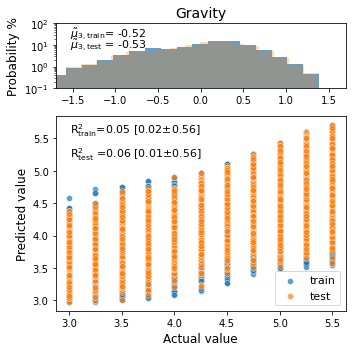

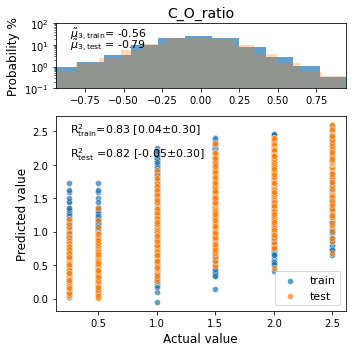

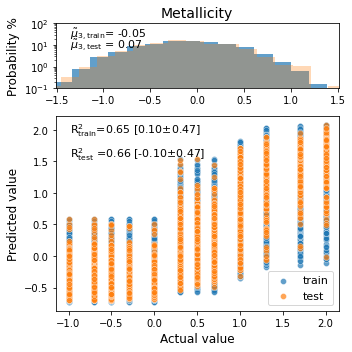

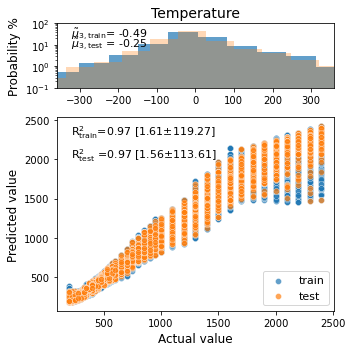

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )